### 기본설정

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


- csv파일 읽어서 처리하기  
- 일단 데이터 다운  
https://www.kaggle.com/competitions/titanic/data

In [4]:
# df = pd.read_csv("train.csv")
# df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


- age와, deck, embarked에 결측치가 존재, 그리고 target은 survived

In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='age', ylabel='Count'>

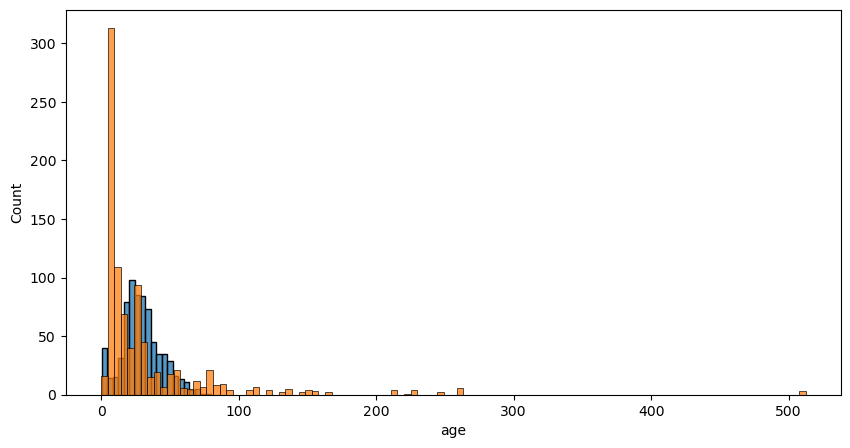

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['age'])
sns.histplot(df["fare"])

- 불균형한 부분에 대한 스케일링이 필요 (특히, fare의 이상치 확인 가능)

<Axes: >

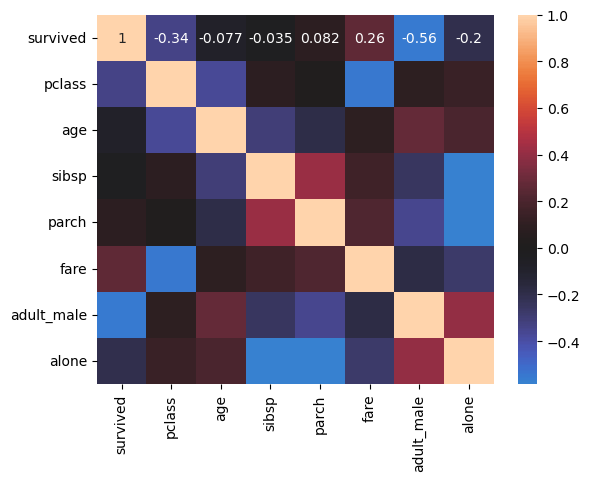

In [8]:
# 숫자형 컬럼 타입만 추출하는 방법
num_cols = df.dtypes[(df.dtypes != "object") & (df.dtypes != "category")].index.to_list()
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, center=0)

In [9]:
# 상관계수를 오름차순으로 정렬 
corr['survived'].abs().sort_values(ascending=False)

survived      1.000000
adult_male    0.557080
pclass        0.338481
fare          0.257307
alone         0.203367
parch         0.081629
age           0.077221
sibsp         0.035322
Name: survived, dtype: float64

- adult_male, pclass, fare 가 가장 높은 연관성을 보이고 있음

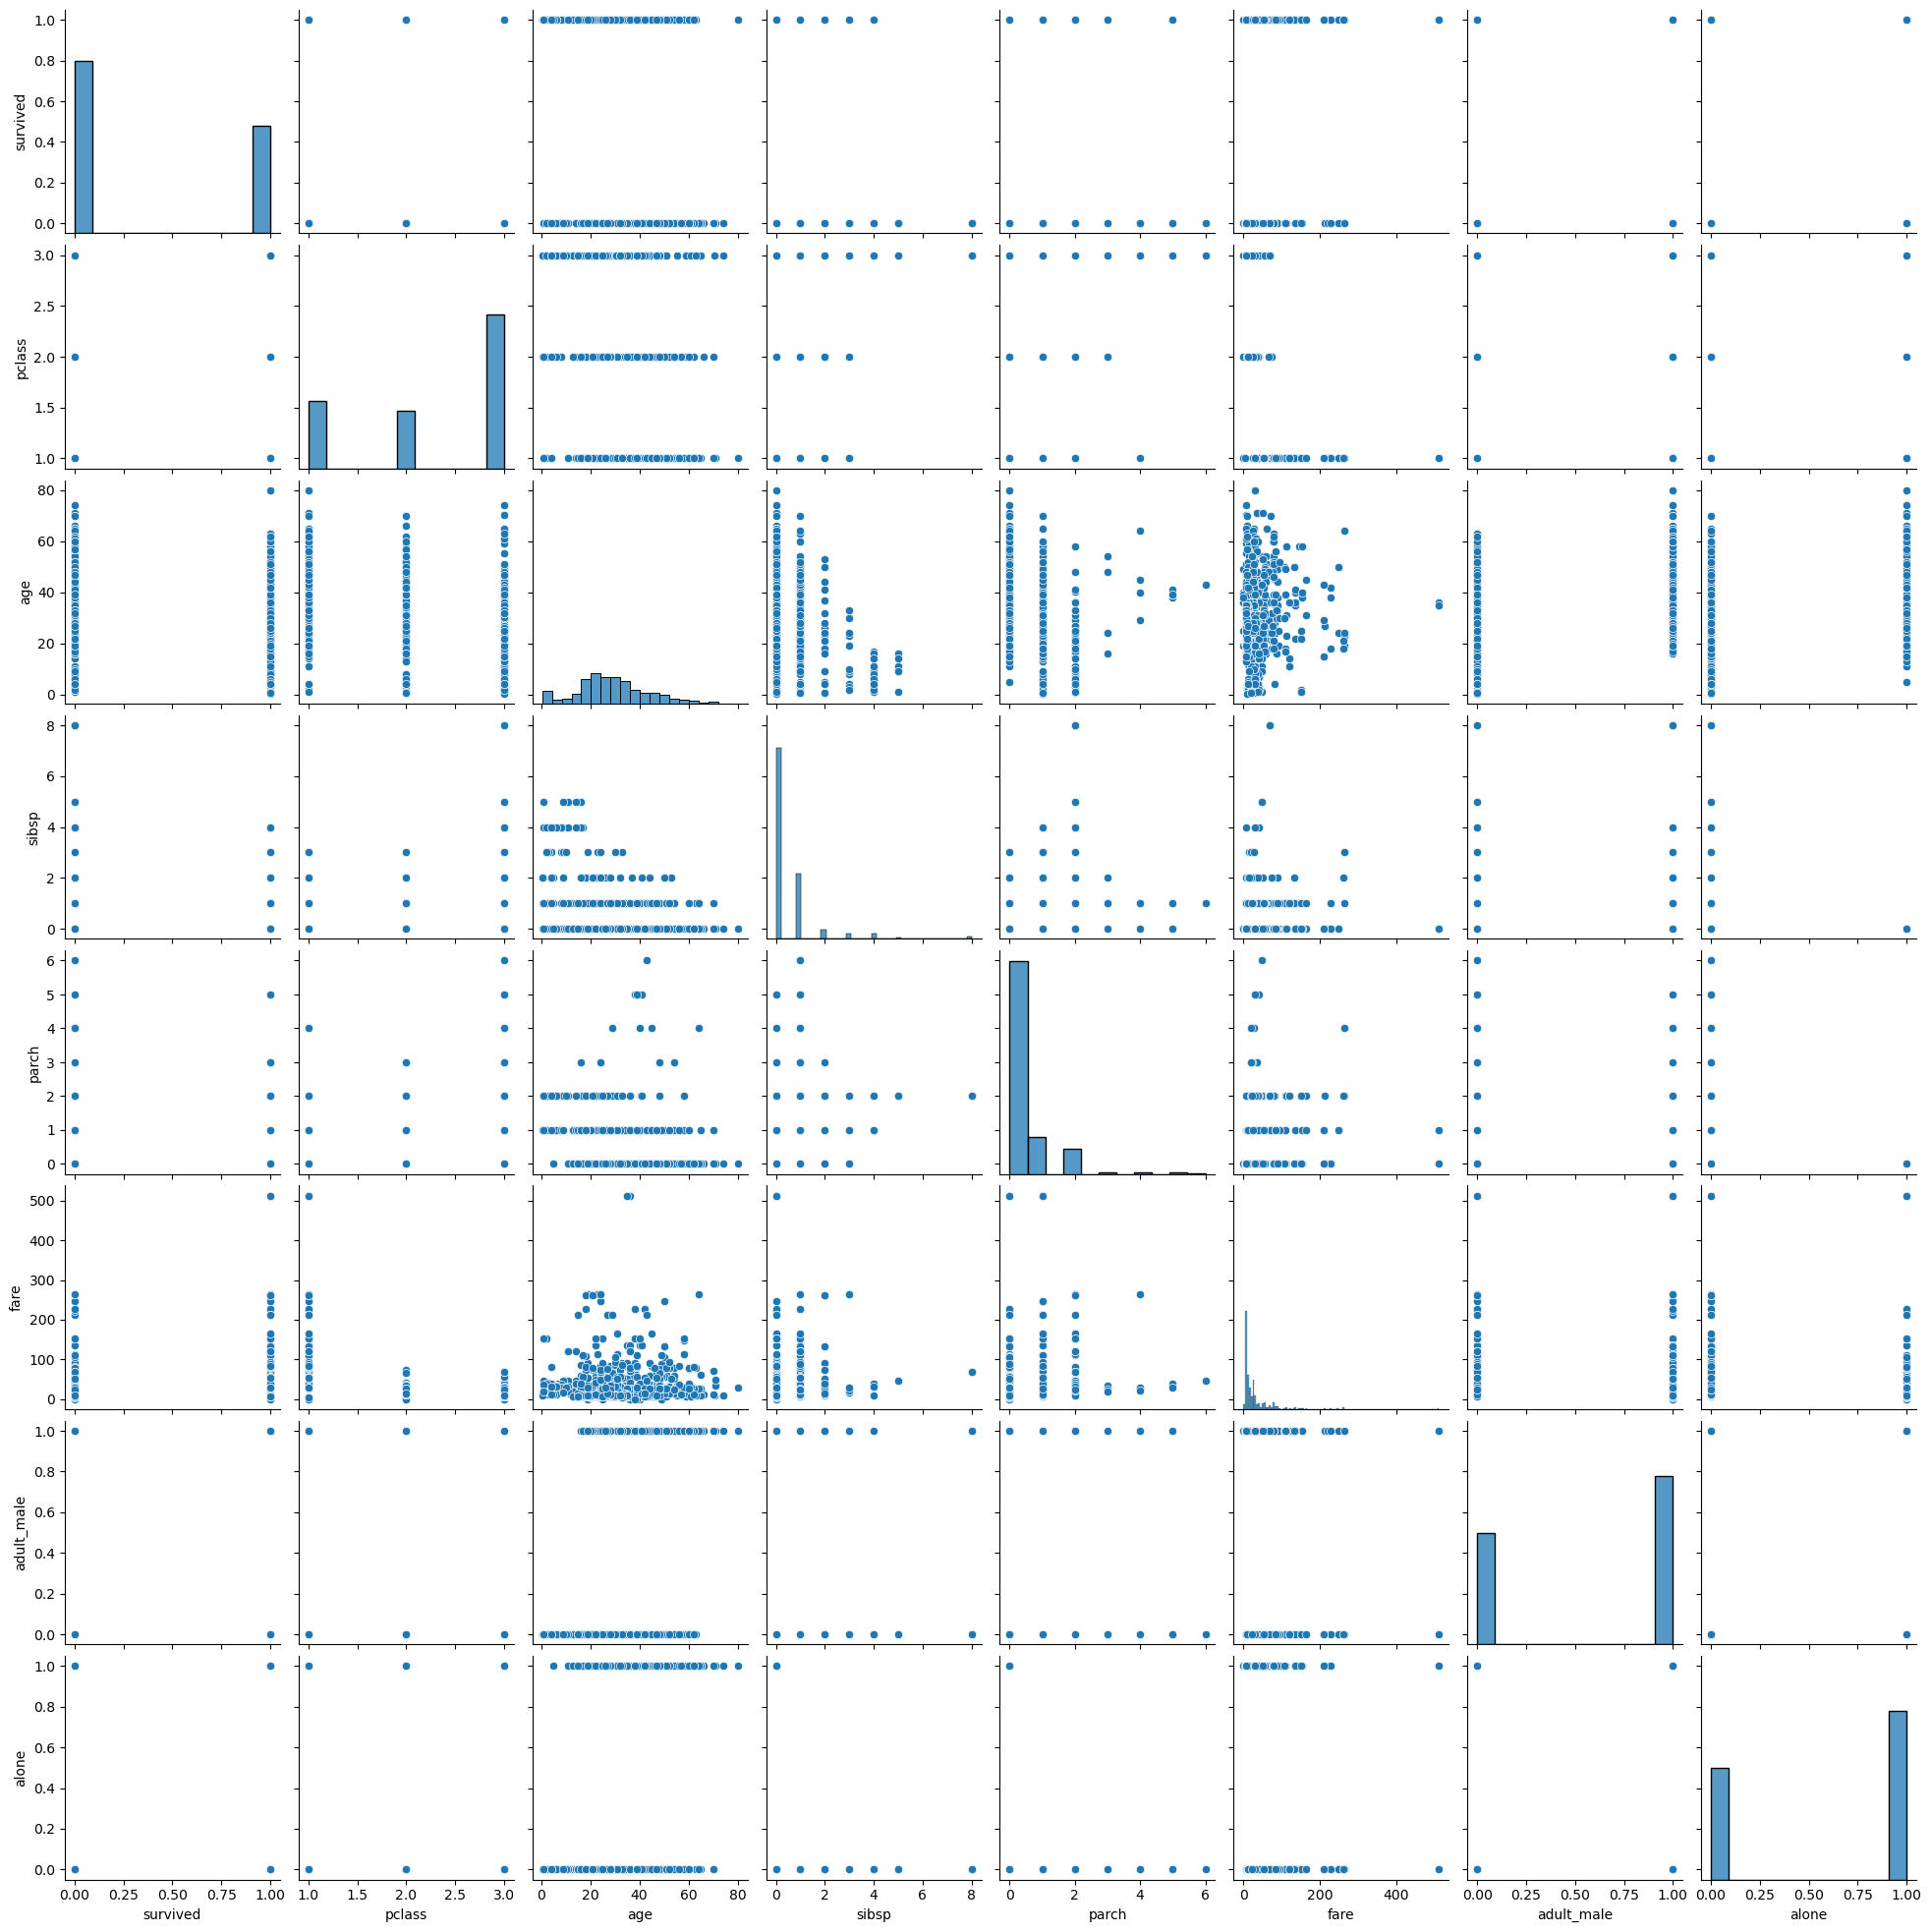

In [10]:
sns.pairplot(df)

- 다중공선성은 독립 변수들 간의 강한 상관관계로 인해 회귀 분석에서 발생하는 문제임
- 0.8 이상의 상관계수를 보이거나 선형관계를 보인다면 의심해볼 필요가 있음 
- 이럴 땐, 차원축소, 해당 변수 제거, Ridge Regression, Lasso Regression을 할 것

In [11]:
target_col = 'survived'
df[target_col].value_counts(normalize=True)

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

<Axes: xlabel='survived', ylabel='count'>

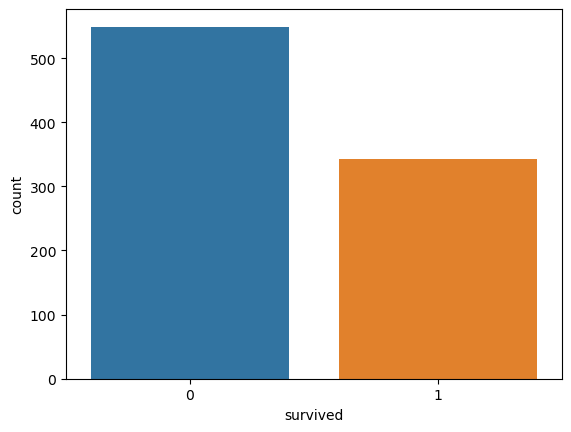

In [12]:
# countplot 예시: 특정 컬럼의 값의 빈도를 시각화
# sns.countplot(x="column_name", data=df)
sns.countplot(x=target_col, data=df)

### 결측치 처리

In [13]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [14]:
# 비율로 나타내기
df.isnull().sum().sort_values(ascending=False)/len(df)*100

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
survived        0.000000
pclass          0.000000
sex             0.000000
sibsp           0.000000
parch           0.000000
fare            0.000000
class           0.000000
who             0.000000
adult_male      0.000000
alive           0.000000
alone           0.000000
dtype: float64

<Axes: >

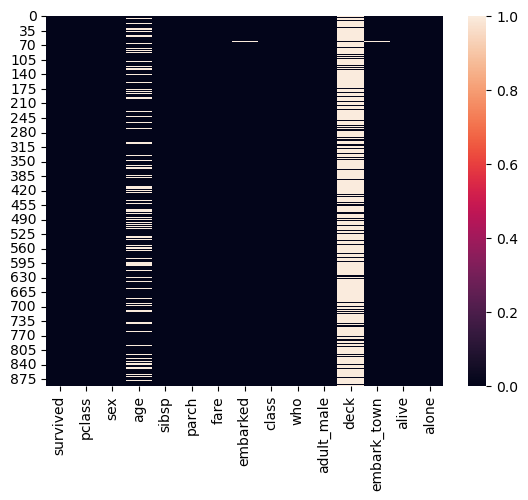

In [15]:
sns.heatmap(df.isnull())

- 여기서 결측치를 단순 제거할 것인가를 판단하기 위해, 타겟과의 연관성을 먼저 파악

In [ ]:
sns.countplot(x='deck', hue='survived', data=df)

- 데크의 값에 따라 생존자와 사망자가 뚜렷하므로, 제거하면 성능이 저하될 수 있음  
-> 결측치 여부를 구분하는 변수를 추가하여 unknown으로 채우기

In [17]:
df_null = df[df.deck.isnull()]
df_null["deck_isnull"] = 1
df_null

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,deck_isnull
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,1
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True,1
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,1
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,1


1. int64 (정수형)
특징: 정수(integer) 데이터를 저장합니다.  
예시: 승객의 나이, ID, 객실 등급 등.  
메모리 사용량이 상대적으로 적으며 소수점을 포함하지 않습니다.  
2. float64 (부동 소수점형)  
특징: 실수(float) 데이터를 저장합니다.  
예시: 운임(fare) 등 소수점을 포함한 값들.  
메모리 사용량은 정수형보다 크며 소수점을 포함한 계산이 가능.  
3. object (문자열 또는 기타 타입)  
특징: 문자열(string) 또는 다른 데이터 타입(날짜, 범주형 데이터 등)을 포함할 수 있는 일반적인 데이터   타입입니다.
예시: 승객 이름, 승선 도시 등.  
가변적 메모리 사용: 문자열 길이에 따라 메모리 사용량이 달라집니다.  
4. bool (논리형)  
특징: 참(True) 또는 거짓(False) 값을 저장하는 논리형 데이터입니다.  
예시: 생존 여부, 성인 남성 여부 등.  
메모리 사용량이 매우 적고, 이진 값을 표현합니다.  
5. category (범주형 데이터)  
특징: 제한된 범위의 값들(범주, 카테고리)을 가집니다. 숫자 또는 문자열 데이터를 저장할 수 있으며, 값의   종류가 적을 때 메모리 사용량이 줄어듭니다.
예시: 객실 등급(pclass), 성별(sex) 등.  
장점: 메모리 효율이 높고, 성능도 향상될 수 있습니다(특히 고정된 범주를 가진 데이터에서).  
6. datetime64 (날짜/시간형)  
특징: 날짜와 시간을 저장하는 데이터 타입입니다.  
예시: 승선 날짜, 생년월일 등.  
특징: 날짜 계산 및 시간 차이를 다룰 수 있습니다.  

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [19]:
# 왜 Unknown으로 넣는가? 결측치 자체를 별도의 범주로 만드는 것, 
# 그리고 A,B,C,D,E의 값이 있기에 하나를 더 추가한 것임
df_null = df_null.astype({"deck" : "object"})
df_null["deck"] = df_null["deck"].fillna("Unknown")

In [20]:
df_notnull = df[df.deck.notnull()]
df_notnull["deck_isnull"] = 0

In [21]:
df = pd.concat([df_null, df_notnull], axis = 0)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,deck_isnull
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True,1
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,Unknown,Queenstown,no,True,1
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Unknown,Southampton,no,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False,0
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True,0
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0


In [ ]:
sns.countplot(x='deck', hue='survived', data=df)

In [22]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck             0
embark_town      2
alive            0
alone            0
deck_isnull      0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

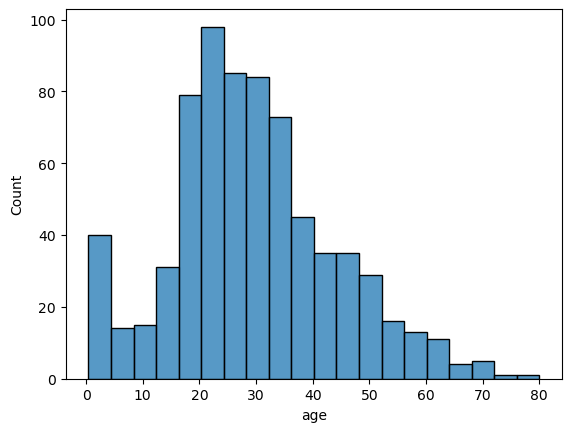

In [23]:
sns.histplot(df.age)

In [24]:
# 평균값으로 처리하기
df["age"] = df["age"].fillna(df.age.mean())

In [25]:
# 채워졌는지 확인
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
deck_isnull    0
dtype: int64

In [ ]:
sns.countplot(x='embark_town', hue='survived', data=df)

In [ ]:
sns.countplot(x="embarked", hue="survived", data=df)

In [26]:
# S가 제일 많은 최빈값으로 대체하는 방법
# df[col].mode() -> 최빈값 리스트를 리턴해주는 방식
df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode()[0])
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
deck_isnull    0
dtype: int64

<Axes: >

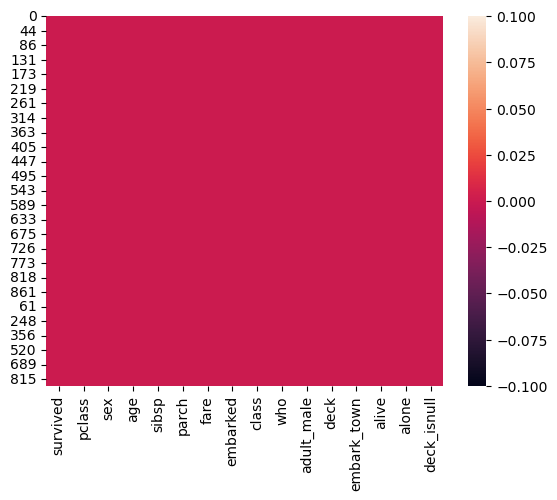

In [27]:
sns.heatmap(df.isnull())

### Encoding

In [28]:
# 이쯤되서 한번 더 확인혀봐
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 889
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    object  
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  deck_isnull  891 non-null    int64   
dtypes: bool(2), category(1), float64(2), int64(5), object(6)
memory usage: 100.2+ KB


### 인코딩라이브러리

In [29]:
# 인코딩 라이브러리 import
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

- 방법 1

In [30]:
labelEncoder = LabelEncoder()
# fit_transform() -> 학습과 변환 / transform() -> 변환
# 두 개의 값만 있는 것은 이진화 인코딩을 수행하기
df["sex"] = labelEncoder.fit_transform(df['sex'])
df["adult_male"] = labelEncoder.fit_transform(df["adult_male"])
df["alive"] = labelEncoder.fit_transform(df["alive"])
df["alone"] = labelEncoder.fit_transform(df["alone"])

- 방법 2

In [31]:
# df["sex"] = df.sex.replace({"female": 1, "male": 0})
# df["adult_male"] = df.adult_male.replace({True: 1, False: 0})
# df["alone"] = df.alone.replace({True: 1, False: 0})
# df["alive"] = df.alive.replace({"yes": 1, "no": 0})

In [32]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,deck_isnull
0,0,3,1,22.000000,1,0,7.2500,S,Third,man,1,Unknown,Southampton,0,0,1
2,1,3,0,26.000000,0,0,7.9250,S,Third,woman,0,Unknown,Southampton,1,1,1
4,0,3,1,35.000000,0,0,8.0500,S,Third,man,1,Unknown,Southampton,0,1,1
5,0,3,1,29.699118,0,0,8.4583,Q,Third,man,1,Unknown,Queenstown,0,1,1
7,0,3,1,2.000000,3,1,21.0750,S,Third,child,0,Unknown,Southampton,0,0,1


In [33]:
df['class'].unique()

['Third', 'Second', 'First']
Categories (3, object): ['First', 'Second', 'Third']

In [34]:
# 정규화, 인코딩
df["class"] = df["class"].replace({"First": 1, "Second": 2, "Third": 3})

In [35]:
df["class"].unique()

[3, 2, 1]
Categories (3, int64): [1, 2, 3]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 889
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int32   
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    int64   
 11  deck         891 non-null    object  
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    int32   
 14  alone        891 non-null    int64   
 15  deck_isnull  891 non-null    int64   
dtypes: category(1), float64(2), int32(2), int64(7), object(4)
memory usage: 105.4+ KB


In [49]:
# 범주형 변수 인코딩
mul_cat = ['deck', 'embark_town', 'embarked', 'who']
for i in mul_cat:
    print(df[i].unique())

['Unknown' 'C' 'E' 'G' 'D' 'A' 'B' 'F']
['Southampton' 'Queenstown' 'Cherbourg']
['S' 'Q' 'C']
['man' 'woman' 'child']


In [50]:
onehotEncoder = OneHotEncoder(sparse_output=False)
onehot = onehotEncoder.fit_transform(df[mul_cat])
## 외우기
col_names = onehotEncoder.get_feature_names_out(mul_cat)
encoded_pd = pd.DataFrame(onehot, columns = col_names)

In [51]:
encoded_pd.head()

,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Unknown,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [52]:
temp = df.drop(mul_cat, axis=1)
df_encoded = pd.concat([temp, encoded_pd], axis=1)
df_encoded.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,alive,...,deck_Unknown,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,1,22.000000,1,0,7.2500,3,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1,3,0,26.000000,0,0,7.9250,3,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,3,1,35.000000,0,0,8.0500,3,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
5,0,3,1,29.699118,0,0,8.4583,3,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7,0,3,1,2.000000,3,1,21.0750,3,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [53]:
x = df_encoded.drop(['survived'], axis=1)
y = df_encoded[["survived"]] # 괄호를 2개 붙여야 함

In [54]:
# 데이터 분할
from sklearn.model_selection import train_test_split
# x에는 데이터, y에는 라벨
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

- 스케일링

<Axes: xlabel='fare', ylabel='Count'>

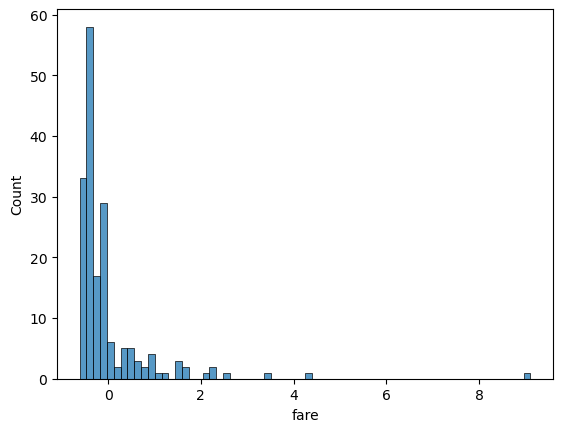

In [55]:
# 뉴메릭
# 만약 음수값이 나오면 minmax로 대체할 것
continuous = ['age', 'fare']
# sns.histplot(df['fare'])
# sns.histplot(df["age"])
scaler = StandardScaler()
X_train[continuous] = scaler.fit_transform(X_train[continuous])
X_test[continuous] = scaler.transform(X_test[continuous])
sns.histplot(X_train["fare"])

## 모델링

In [56]:
# 분류
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# 회귀
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    VotingClassifier
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [57]:
lr = LogisticRegression() # sklearn.linear_model
rf = RandomForestClassifier() # sklearn.ensemble
ab = AdaBoostClassifier() # sklearn.ensmeble
gb = GradientBoostingClassifier()
dt = DecisionTreeClassifier()
svc = SVC()

estimators = [('LR', lr), ('RF', rf), ('AB', ab), ('GB', gb)]

In [59]:
from sklearn.metrics import accuracy_score
voting = VotingClassifier(estimators, voting="hard")
voting.fit(X_train, y_train)
y_voting = voting.predict(X_test)

print(accuracy_score(y_test, y_voting))

1.0


In [63]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [10, 20, 30],
    'min_samples_split' : [2, 5, 10],
    'bootstrap':[True, False]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring="accuracy",
    verbose=2,
    random_state=42,
)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
best_params = random_search.best_params_
print(best_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=30, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, min_samples_split=5, 

In [65]:
print(best_model)

y_pred = best_model.predict(X_test)

print(accuracy_score(y_pred, y_test))

RandomForestClassifier(max_depth=30, n_estimators=200)
1.0
